<a href="https://colab.research.google.com/github/ZishanAli14/ZishanAli14/blob/main/GB_M8L1_Text_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Text Preprocessing for NLP**
In this lab we will learn how to preprocess raw text data and make it suitable for further processing by DL models. We will perform this processing in two ways.
1. Using NLTK Library
2. Using Tensorflow
First, let's see how we can preprocess raw text data using NLTK.

Import NLTK library and download relevant modules.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import random
import nltk    #Natural Language Toolkit
nltk.download('stopwords')  # download list of stop word(and, the, is, etc) which are meaning less
nltk.download('punkt')      # download data for tokenization of NLtk
nltk.download('averaged_perceptron_tagger')     # part of Speech tagging(Grameritical part of speech, none, verbs, adverbs)
nltk.download('maxent_ne_chunker')              # Download name entity (name of places, person, etc)
nltk.download('words')    # Download nltk's list of english words
random.seed(92)       # Random 92 sentense

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


Let's define a corpus of raw text. For this example the following text is taken from wikipedia page on NLP (https://en.wikipedia.org/wiki/Natural_language_processing).
You will notice that the text contains words, numbers, punctuations, and other special characters. This is RAW form of text. For different NLP tasks, it is required to preprocess this data to make it more structures and workable.

In [ ]:
corpus = str(["""In 2003, word n-gram model, at the time the best statistical algorithm, was overperformed by a multi-layer perceptron (with a single hidden layer and context length of several words trained on up to 14 million of words with a CPU cluster in language modelling) by Yoshua Bengio with co-authors.[8]
In 2010, Tomáš Mikolov (then a PhD student at Brno University of Technology) with co-authors applied a simple recurrent neural network with a single hidden layer to language modelling,[9] and in the following years he went on to develop Word2vec.
In the 2010s, representation learning and deep neural network-style (featuring many hidden layers) machine learning methods became widespread in natural language processing.
That popularity was due partly to a flurry of results showing that such techniques[10][11] can achieve state-of-the-art results in many natural language tasks, e.g., in language modeling[12] and parsing.[13][14]
This is increasingly important in medicine and healthcare, where NLP helps analyze notes and text in electronic health records that would otherwise be inaccessible for study when seeking to improve care[15] or protect patient privacy.[16]"""])

**Tokenization**
Tokenization means dividing a piece of raw text into semantically and syntactically meaningful units, called tokens. These tokens can be at setence-level (sentence tokens) or at the word-level (word tokens). At word level, NLTK recognises each word seperated by white-space, number, and punctuations as distinct tokens.

The following code passes the raw text (corpus) to the sent_tokenize() method which converts the text into sentences. Each sentence is then further tokenized into smaller units using word_tokenize() method.

pos_tag() method and ne_chunk() methods perform Part-Of-Speech tagging and Named-Entity Recognition, respectively. The POS tagging is a task in which each word is tagged with a part-of-speech category. For example, the word 'horse' is tagged as a noun and 'walk' is tagged as a verb. A Named-Entity is a word (or a set of words) that represent name of a person, place, organisation, unit of measurement, etc.

In [1]:
token_list = []
sentences = nltk.sent_tokenize(str(corpus))
for sentence in sentences:
  words = nltk.word_tokenize(sentence)
  token_list.extend(words)
  tagged_words = nltk.pos_tag(words)
  named_entities = nltk.ne_chunk(tagged_words)

print(token_list)
print ('\nLength of word_list:', len(token_list))

NameError: ignored

Another way to tokenize a piece of text using NLTK is to use the split() method as shown below.

In [ ]:
word_list = corpus.split()
print(word_list)
print ('\nLength of word_list:', len(word_list))

["['In", '2003,', 'word', 'n-gram', 'model,', 'at', 'the', 'time', 'the', 'best', 'statistical', 'algorithm,', 'was', 'overperformed', 'by', 'a', 'multi-layer', 'perceptron', '(with', 'a', 'single', 'hidden', 'layer', 'and', 'context', 'length', 'of', 'several', 'words', 'trained', 'on', 'up', 'to', '14', 'million', 'of', 'words', 'with', 'a', 'CPU', 'cluster', 'in', 'language', 'modelling)', 'by', 'Yoshua', 'Bengio', 'with', 'co-authors.[8]\\nIn', '2010,', 'Tomáš', 'Mikolov', '(then', 'a', 'PhD', 'student', 'at', 'Brno', 'University', 'of', 'Technology)', 'with', 'co-authors', 'applied', 'a', 'simple', 'recurrent', 'neural', 'network', 'with', 'a', 'single', 'hidden', 'layer', 'to', 'language', 'modelling,[9]', 'and', 'in', 'the', 'following', 'years', 'he', 'went', 'on', 'to', 'develop', 'Word2vec.\\nIn', 'the', '2010s,', 'representation', 'learning', 'and', 'deep', 'neural', 'network-style', '(featuring', 'many', 'hidden', 'layers)', 'machine', 'learning', 'methods', 'became', 'wide

What's the difference between tokens obtained through word_tokenize() method and through split() method?

Next, we filter the tokens and keep only those that contains alphabets.

In [ ]:
alphabets_only = [word for word in word_list if word.isalpha()]
print(alphabets_only)
print ('\nLength of word_list:', len(alphabets_only))

['word', 'at', 'the', 'time', 'the', 'best', 'statistical', 'was', 'overperformed', 'by', 'a', 'perceptron', 'a', 'single', 'hidden', 'layer', 'and', 'context', 'length', 'of', 'several', 'words', 'trained', 'on', 'up', 'to', 'million', 'of', 'words', 'with', 'a', 'CPU', 'cluster', 'in', 'language', 'by', 'Yoshua', 'Bengio', 'with', 'Tomáš', 'Mikolov', 'a', 'PhD', 'student', 'at', 'Brno', 'University', 'of', 'with', 'applied', 'a', 'simple', 'recurrent', 'neural', 'network', 'with', 'a', 'single', 'hidden', 'layer', 'to', 'language', 'and', 'in', 'the', 'following', 'years', 'he', 'went', 'on', 'to', 'develop', 'the', 'representation', 'learning', 'and', 'deep', 'neural', 'many', 'hidden', 'machine', 'learning', 'methods', 'became', 'widespread', 'in', 'natural', 'language', 'popularity', 'was', 'due', 'partly', 'to', 'a', 'flurry', 'of', 'results', 'showing', 'that', 'such', 'can', 'achieve', 'results', 'in', 'many', 'natural', 'language', 'in', 'language', 'and', 'is', 'increasingly'

**Text Normalisation** means to remove any capitalisation in the text and convert all tokens to lower case.

In [ ]:
lower_case = [word.lower() for word in alphabets_only]
print(lower_case)
print ('\nLength of word_list:', len(lower_case))

['word', 'at', 'the', 'time', 'the', 'best', 'statistical', 'was', 'overperformed', 'by', 'a', 'perceptron', 'a', 'single', 'hidden', 'layer', 'and', 'context', 'length', 'of', 'several', 'words', 'trained', 'on', 'up', 'to', 'million', 'of', 'words', 'with', 'a', 'cpu', 'cluster', 'in', 'language', 'by', 'yoshua', 'bengio', 'with', 'tomáš', 'mikolov', 'a', 'phd', 'student', 'at', 'brno', 'university', 'of', 'with', 'applied', 'a', 'simple', 'recurrent', 'neural', 'network', 'with', 'a', 'single', 'hidden', 'layer', 'to', 'language', 'and', 'in', 'the', 'following', 'years', 'he', 'went', 'on', 'to', 'develop', 'the', 'representation', 'learning', 'and', 'deep', 'neural', 'many', 'hidden', 'machine', 'learning', 'methods', 'became', 'widespread', 'in', 'natural', 'language', 'popularity', 'was', 'due', 'partly', 'to', 'a', 'flurry', 'of', 'results', 'showing', 'that', 'such', 'can', 'achieve', 'results', 'in', 'many', 'natural', 'language', 'in', 'language', 'and', 'is', 'increasingly'

Stopword removal means to remove those words from the remaining tokens that appear frequently in English language but contribute very little to the overall meaning of the text. It is important to note here that stopword removal should not be applied to every NLP task since in some application these stopwords are important as well.

In [ ]:
from nltk.corpus import stopwords

stopwords_nltk = set(stopwords.words('english'))
print(stopwords_nltk)
print ('\nLength of word_list:', len(stopwords_nltk), '\n')

cleaned_words = [word for word in lower_case if word not in stopwords_nltk]
print(cleaned_words)
print ('\nLength of word_list:', len(cleaned_words))

{'herself', 'you', "isn't", "aren't", 'yourselves', 'who', 'through', 'them', 'from', "it's", 'we', 'himself', 'more', 'those', 'such', "mightn't", 'because', 'not', 'd', 'i', 'be', 'just', 'above', 'few', 'a', 'does', "you've", 'ourselves', 'while', 'each', 'have', 'he', 'these', "didn't", "haven't", 'shan', 'mightn', 'this', 'can', 'any', 'couldn', "mustn't", 'again', 'hasn', "she's", 'after', 'once', 'yours', 'during', 'isn', 'before', "hasn't", 'as', 'been', 've', 'with', "don't", 'by', 'if', 'all', 'hadn', "needn't", 'won', 'mustn', 'his', 'did', 'own', 'or', 'to', 'should', 'she', 'y', 'but', "should've", 'didn', 'which', 'wasn', 'ma', 'm', 'why', 'down', 'up', 'do', 'at', 'now', 'between', 'weren', "wouldn't", 'there', 'him', 'her', 'until', "shan't", 'the', 'over', 'very', "won't", "that'll", 'some', 'its', 'only', 'shouldn', 'having', 'doing', 'had', 'into', 'and', 'most', 'nor', 'll', "wasn't", 'under', "doesn't", 'when', 'was', 'hers', 'your', 'haven', 'no', 'needn', 'aren',

This concludes the first part of this lab which deals with preprocessing raw text using NLTK. Now Let's use tensorfolow to perform similar preprocessing (note the difference in the implementation of both libraries) and build a complete example of sentiment analysis.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
    'i love my dog',
    'I, love my cat',
    'You love my dog!'
]

tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}


In [ ]:
import json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences, maxlen=5)
print("\nWord Index = " , word_index)
print("\nSequences = " , sequences)
print("\nPadded Sequences:")
print(padded)


Word Index =  {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

Sequences =  [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]

Padded Sequences:
[[ 0  5  3  2  4]
 [ 0  5  3  2  7]
 [ 0  6  3  2  4]
 [ 9  2  4 10 11]]


In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json

--2023-08-21 09:38:00--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.250.141.128, 142.251.2.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.07s   

2023-08-21 09:38:01 (76.3 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [ ]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 5s - loss: 0.6626 - accuracy: 0.5901 - val_loss: 0.5743 - val_accuracy: 0.8035 - 5s/epoch - 9ms/step
Epoch 2/30
625/625 - 3s - loss: 0.4209 - accuracy: 0.8313 - val_loss: 0.3774 - val_accuracy: 0.8445 - 3s/epoch - 4ms/step
Epoch 3/30
625/625 - 3s - loss: 0.3033 - accuracy: 0.8795 - val_loss: 0.3490 - val_accuracy: 0.8535 - 3s/epoch - 4ms/step
Epoch 4/30
625/625 - 3s - loss: 0.2523 - accuracy: 0.9002 - val_loss: 0.3422 - val_accuracy: 0.8577 - 3s/epoch - 5ms/step
Epoch 5/30
625/625 - 4s - loss: 0.2171 - accuracy: 0.9169 - val_loss: 0.3472 - val_accuracy: 0.8556 - 4s/epoch - 7ms/step
Epoch 6/30
625/625 - 3s - loss: 0.1889 - accuracy: 0.9280 - val_loss: 0.3539 - val_accuracy: 0.8544 - 3s/epoch - 4ms/step
Epoch 7/30
625/625 - 3s - loss: 0.1668 - accuracy: 0.9369 - val_loss: 0.3689 - val_accuracy: 0.8541 - 3s/epoch - 4ms/step
Epoch 8/30
625/625 - 3s - loss: 0.1506 - accuracy: 0.9447 - val_loss: 0.4001 - val_accuracy: 0.8462 - 3s/epoch - 4ms/step
Epoch 9/30
625/625 - 4s 

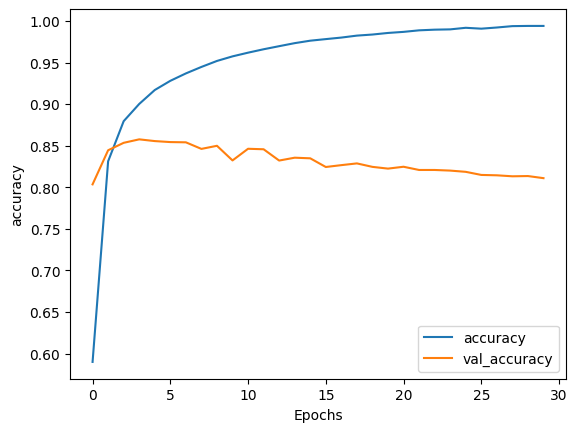

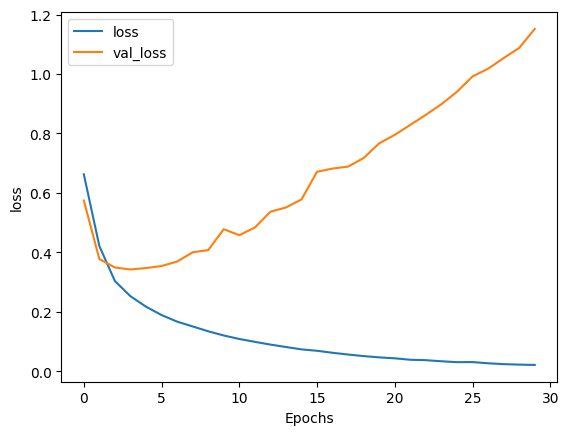

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 100ms/step
[[9.182132e-01]
 [5.686376e-06]]
